In [1]:
import pandas as pd
import openpyxl
df = pd.read_excel('./datasets/default of credit card clients.xls',header=1)
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [2]:
df.corr()

x = df.drop(['ID','default payment next month'],axis=1)
y = df[['default payment next month']]

<AxesSubplot:>

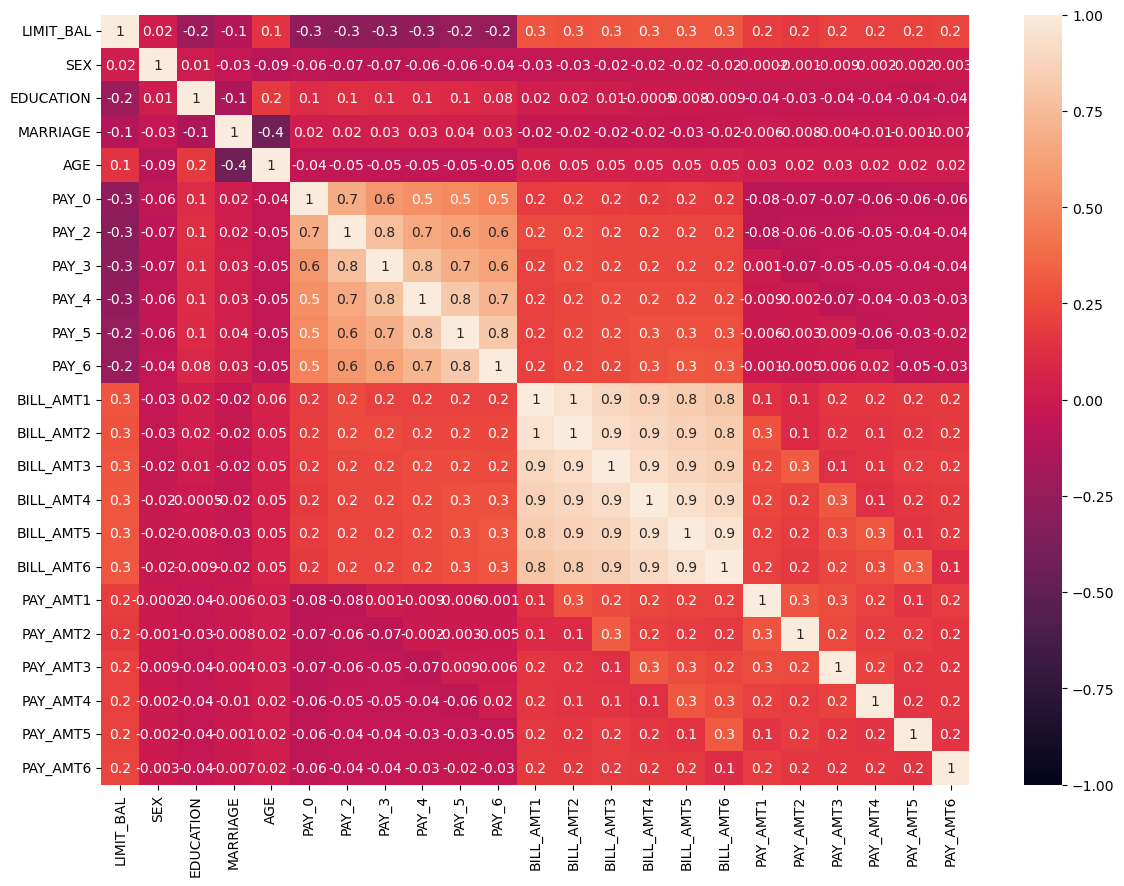

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
corr = x.corr()
sns.heatmap(corr,vmin=-1,vmax=1,annot=True,fmt='.1g')

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [5]:
## 1 원본데이터
rcf = RandomForestRegressor(n_estimators=300,random_state=156)
lcf = LogisticRegression()

scores_2 = cross_val_score(lcf,x,y,cv=3,scoring='accuracy')
print(scores_2,scores_2.mean())


c:\Users\msi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\msi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\msi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

[0.7783 0.7788 0.7789] 0.7786666666666667


c:\Users\msi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# 2 PCA 변환

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

pca = PCA(n_components=7)
x_pca = pca.fit_transform(x_scale)



score_pca_1 = cross_val_score(lcf,x_pca,y,scoring='accuracy',cv=3)
print(score_pca_1,score_pca_1.mean())


[0.7978 0.7981 0.7988] 0.7982333333333332


c:\Users\msi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\msi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\msi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
## pay 변수끼리 bill 변수끼리 일딴 pca 실행후 x데이터 셋을 만들어 예측
pay_name = ['PAY_'+str(i) for i in range(1,7)]
bill_name = ['BILL_AMT'+str(i) for i in range(1,7)]
drop_name = pay_name+bill_name

In [15]:
pay = x.iloc[:,5:11]
bill = x.iloc[:,11:17]

In [16]:
pay_scale = scaler.fit_transform(pay)
bill = scaler.fit_transform(bill)

pca= PCA(n_components=2)
pay_pca = pd.DataFrame(pca.fit_transform(pay),columns=['pay_pca1','pay_pca2'])
bill_pca = pd.DataFrame(pca.fit_transform(bill),columns=['bill_pca1','bill_pca2'])

In [17]:
pca_col = pd.concat([pay_pca,bill_pca],axis=1)

In [18]:
score_pca_1 = cross_val_score(lcf,pca_col,y,scoring='accuracy',cv=3)
print(score_pca_1,score_pca_1.mean())

[0.8004 0.8021 0.8044] 0.8023000000000001


c:\Users\msi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\msi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\msi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
